<a href="https://colab.research.google.com/github/ihadzic1/Analysis-of-Nutrition-and-Caloric-Intake-Using-Image-Classification-Models/blob/fruit-detection/Food_Classification_Model_Training_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Install required libraries
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
#Import the dataset from roboflow with the following code
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gbnE2mI51TkywHQXfMAH")
project = rf.workspace("foodobjectdetection-gbrbd").project("foodobjectdetectiondataset")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FoodObjectDetectionDataset-1 in yolov8:: 100%|██████████| 6418/6418 [00:00<00:00, 7679.36it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


model = YOLO("yolov8x.pt")  # Using YOLOv8x as base (transfer learning)
dataset_location = dataset.location # Set dataset location

model.train(
    data=f"{dataset_location}/data.yaml",
    epochs=20,         # Set number of epochs
    imgsz=640,        # Set image size
    batch=16,        # Determine batch size
    device=0        # GPU = 0; use 'cpu' if no GPU
)


Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/FoodObjectDetectionDataset-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]

Overriding model.yaml nc=80 with nc=24

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           


  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1948800  ultralytics.nn.modules.block.C2f             [960,

100%|██████████| 5.35M/5.35M [00:00<00:00, 98.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1156.6±355.1 MB/s, size: 41.8 KB)


train: Scanning /content/FoodObjectDetectionDataset-1/train/labels... 2745 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2745/2745 [00:01<00:00, 2270.75it/s]


train: New cache created: /content/FoodObjectDetectionDataset-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 99, len(boxes) = 11531. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 625.8±328.7 MB/s, size: 33.3 KB)


val: Scanning /content/FoodObjectDetectionDataset-1/valid/labels... 277 images, 0 backgrounds, 0 corrupt: 100%|██████████| 277/277 [00:00<00:00, 721.67it/s]

val: New cache created: /content/FoodObjectDetectionDataset-1/valid/labels.cache


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21, len(boxes) = 922. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000357, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20        12G      1.251      2.228      1.581         66        640: 100%|██████████| 172/172 [03:33<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.12s/it]

                   all        277        922      0.369      0.525      0.425      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      12.4G      1.236      1.616      1.564         78        640: 100%|██████████| 172/172 [03:34<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        277        922      0.683      0.669      0.666      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      12.5G      1.182      1.498      1.519         92        640: 100%|██████████| 172/172 [03:33<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        277        922      0.407      0.649      0.468      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      12.5G      1.154      1.402      1.504         29        640: 100%|██████████| 172/172 [03:32<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        277        922      0.604       0.67      0.622      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      12.4G      1.129       1.33      1.478         74        640: 100%|██████████| 172/172 [03:32<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]

                   all        277        922       0.81      0.663      0.717      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      12.5G      1.108      1.221      1.456         61        640: 100%|██████████| 172/172 [03:32<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        277        922      0.654      0.796      0.743      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.5G      1.052      1.077      1.422         73        640: 100%|██████████| 172/172 [03:32<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]

                   all        277        922      0.757       0.73      0.738      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      12.5G      1.039      1.027      1.403         58        640: 100%|██████████| 172/172 [03:33<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        277        922      0.678      0.762      0.755      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      12.5G      1.007      0.987      1.387         50        640: 100%|██████████| 172/172 [03:32<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        277        922      0.639      0.807      0.729      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      12.3G     0.9873      0.911      1.365         36        640: 100%|██████████| 172/172 [03:32<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]

                   all        277        922      0.787      0.772      0.806      0.638


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.4G     0.9709     0.8396      1.427         65        640: 100%|██████████| 172/172 [03:33<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        277        922      0.759       0.79      0.786      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      12.5G     0.9354     0.7739      1.382         17        640: 100%|██████████| 172/172 [03:32<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        277        922       0.71      0.892      0.824      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      12.5G     0.9381     0.7263       1.39         68        640: 100%|██████████| 172/172 [03:32<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        277        922      0.768      0.795      0.794      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.4G      0.901      0.659      1.354         34        640: 100%|██████████| 172/172 [03:31<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]

                   all        277        922      0.788        0.8      0.785      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      12.5G     0.8783     0.6066      1.339         17        640: 100%|██████████| 172/172 [03:32<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]

                   all        277        922      0.705       0.82      0.783      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.5G     0.8486     0.5704      1.315         21        640: 100%|██████████| 172/172 [03:32<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        277        922      0.785      0.814      0.798      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      12.4G      0.826     0.5369      1.299         15        640: 100%|██████████| 172/172 [03:32<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]

                   all        277        922      0.699        0.9      0.819      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      12.5G      0.807     0.5031      1.269         30        640: 100%|██████████| 172/172 [03:32<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]

                   all        277        922      0.717      0.848      0.803      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.4G     0.7838     0.4733      1.247         46        640: 100%|██████████| 172/172 [03:32<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        277        922      0.816      0.813      0.818      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      12.5G     0.7563     0.4418      1.234         47        640: 100%|██████████| 172/172 [03:32<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        277        922      0.739      0.818      0.817      0.664



20 epochs completed in 1.290 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.8MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.8MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,146,680 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.05s/it]


                   all        277        922      0.737      0.818      0.816      0.664
                 apple         78        163       0.84      0.939      0.931      0.775
                banana        136        210      0.992       0.99      0.993      0.757
                cherry         18         54      0.824      0.907      0.935      0.744
          dragon fruit          6          6          0          0      0.113     0.0794
                  kiwi         10         34       0.74      0.941      0.954      0.801
                 mango          8         28      0.706      0.857      0.845      0.762
                orange         85        149      0.912      0.629      0.916      0.759
                  pear         43         43      0.911          1      0.985      0.862
             pineapple         56         56      0.974      0.982      0.981      0.856
            strawberry         15         74      0.952      0.946      0.967      0.753
           sugar appl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  2,  6,  7, 11, 14, 15, 16, 17, 21, 22, 23])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d08e9934690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [21]:
print("\n--- Evaluation Metrics ---")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precision (mean): {metrics.box.mp:.4f}")
print(f"Recall (mean): {metrics.box.mr:.4f}")

class_names = model.names
num_metrics = len(metrics.box.p)

print("\nPer-Class Metrics:")
print(f"{'Class':15s} | {'Precision':>9} | {'Recall':>7} | {'AP@0.5':>7} | {'AP@0.5:0.95':>12}")
print("-" * 60)

for i in range(num_metrics):
    name = class_names[i]
    p = metrics.box.p[i]
    r = metrics.box.r[i]
    ap50 = metrics.box.ap50[i]
    ap = metrics.box.ap[i]
    print(f"{name:15s} | {p:.2f}       | {r:.2f}   | {ap50:.2f}   | {ap:.2f}")



--- Evaluation Metrics ---
mAP@0.5: 0.8177
mAP@0.5:0.95: 0.6655
Precision (mean): 0.7394
Recall (mean): 0.8174

Per-Class Metrics:
Class           | Precision |  Recall |  AP@0.5 |  AP@0.5:0.95
------------------------------------------------------------
apple           | 0.84       | 0.94   | 0.93   | 0.78
avocado         | 0.99       | 0.99   | 0.99   | 0.76
banana          | 0.82       | 0.91   | 0.93   | 0.74
blackberry      | 0.00       | 0.00   | 0.11   | 0.08
blueberry       | 0.76       | 0.94   | 0.95   | 0.80
cevap           | 0.71       | 0.86   | 0.85   | 0.77
cherry          | 0.91       | 0.63   | 0.92   | 0.76
dragon fruit    | 0.91       | 1.00   | 0.98   | 0.86
grape           | 0.97       | 0.98   | 0.98   | 0.86
grapefruit      | 0.95       | 0.95   | 0.97   | 0.75
half pita bread | 0.32       | 0.87   | 0.45   | 0.38
kiwi            | 0.68       | 0.76   | 0.74   | 0.45


invalid value encountered in divide


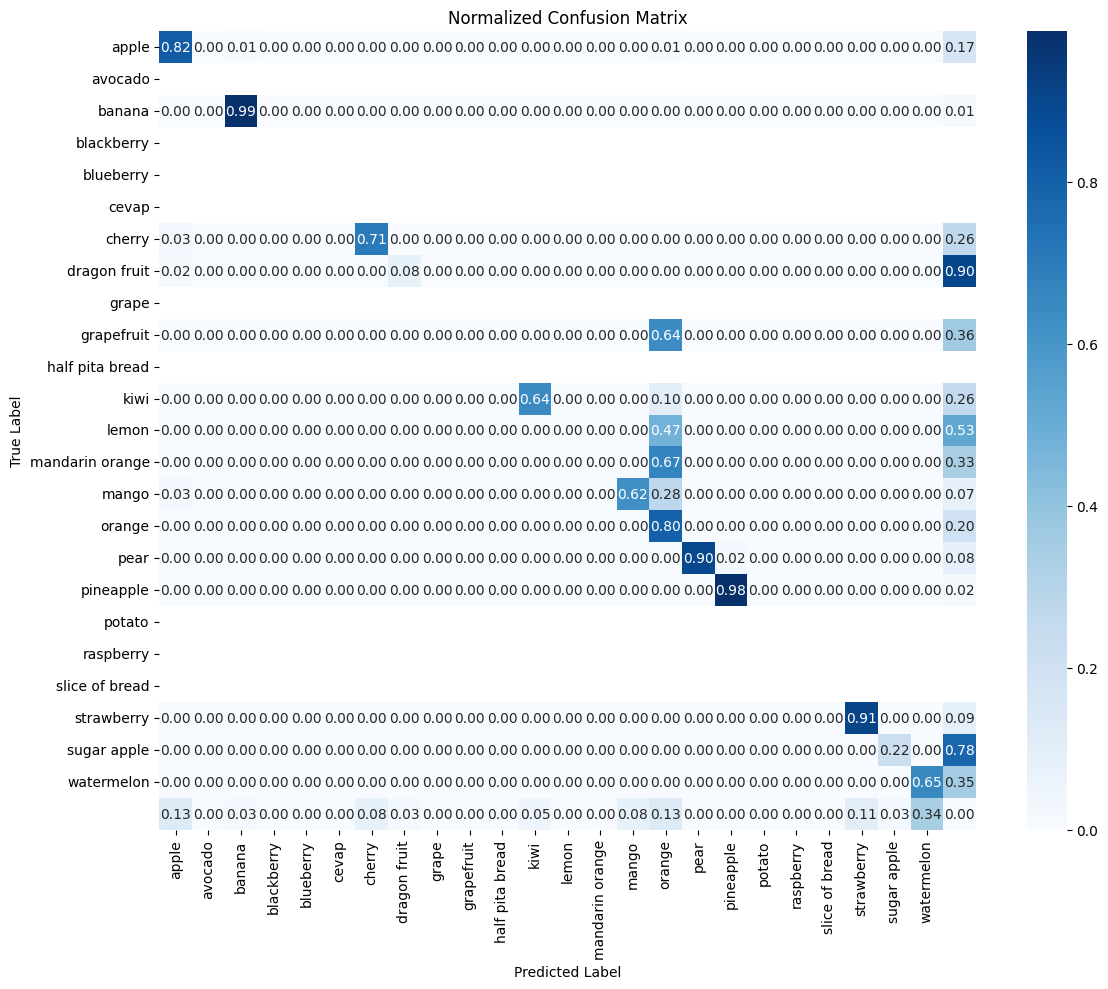

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Prepare lists for true and predicted class indices
true_classes = []
pred_classes = []

# Confusion matrix
cm = metrics.confusion_matrix.matrix

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=model.names.values(),
            yticklabels=model.names.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.tight_layout()
plt.show()


In [12]:
#Zip the model
!zip -r best_model_x.zip runs/detect/train2/weights/

#Download the model
from google.colab import files
files.download("best_model_x.zip")


  adding: runs/detect/train2/weights/ (stored 0%)
  adding: runs/detect/train2/weights/best.pt (deflated 8%)
  adding: runs/detect/train2/weights/last.pt (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>